In [13]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

file1 = 'athletes.csv'
file2 = 'countries.csv'

athletes=pd.read_csv(file1)
countries = pd.read_csv(file2)
countries.rename(columns = {'code':'nationality'}, inplace = True)

full_athlete_df = pd.merge(athletes,countries,how='inner',on ='nationality')
full_athlete_df['sex'] = full_athlete_df.sex.map(dict(female=1, male=0))

full_athlete_df['Won_a_medal'] = full_athlete_df['gold'] + full_athlete_df['silver'] + full_athlete_df['bronze']
full_athlete_df['Won_a_medal'].values[full_athlete_df['Won_a_medal'].values > 0] = 1
full_athlete_df['dob'] = pd.to_datetime(full_athlete_df.dob)
full_athlete_df['dob'] = full_athlete_df['dob'].mask(full_athlete_df['dob'].dt.year > 2016,
                                               full_athlete_df['dob'] - pd.DateOffset(years=100))
full_athlete_df=full_athlete_df.drop(['gold', 'silver','bronze','id','name','nationality'], axis=1)
full_athlete_df["dob"]= [2014-x.year  for x in full_athlete_df["dob"]]
full_athlete_df.columns

Index(['sex', 'dob', 'height', 'weight', 'sport', 'country', 'population',
       'gdp_per_capita', 'Won_a_medal'],
      dtype='object')

Q1.1

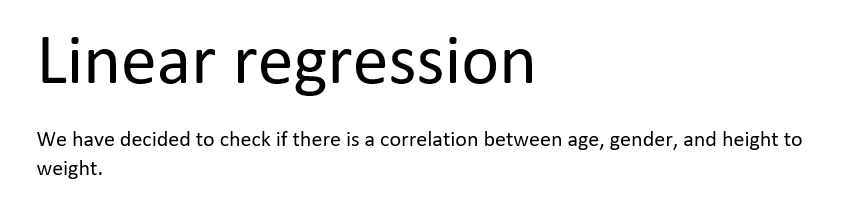

In [ ]:
#NOTE: we have decided to use 'age' and 'dob' interchangibly since in some situations, they hold the same meaning.

Q1.2


In [30]:
full_athlete_df= full_athlete_df.dropna()
df=full_athlete_df.sample(n=200)
#for Q1.9:
df_all = full_athlete_df.merge(df, how='left', indicator=True)
not_in_sampled = df_all[df_all["_merge"] == "left_only"]
athletes_df_1000 = not_in_sampled.sample(1000).drop("_merge", axis=1)
df

,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won_a_medal
9149,0,30.0,1.89,86.0,athletics,Finland,5482013.0,42311.036231,0
4327,1,15.0,1.42,35.0,gymnastics,Russia,144096812.0,9092.580536,1
3281,1,23.0,1.67,54.0,gymnastics,Netherlands,16936520.0,44299.768085,0
522,0,22.0,1.82,65.0,table tennis,"Korea, South",50617045.0,27221.524051,0
7346,1,30.0,1.51,48.0,equestrian,Japan,126958472.0,32477.215145,0
...,...,...,...,...,...,...,...,...,...
8334,1,28.0,1.72,62.0,athletics,Switzerland,8286976.0,80945.079219,0
2242,0,25.0,1.80,68.0,athletics,United Kingdom,65138232.0,43875.969614,0
344,0,25.0,1.89,80.0,equestrian,"Korea, South",50617045.0,27221.524051,0
7034,1,26.0,1.80,120.0,athletics,Turkey,78665830.0,9125.687590,0


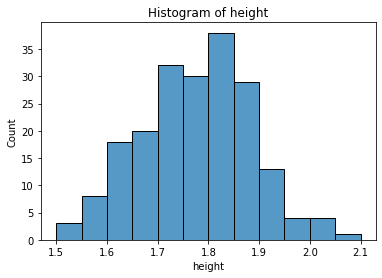

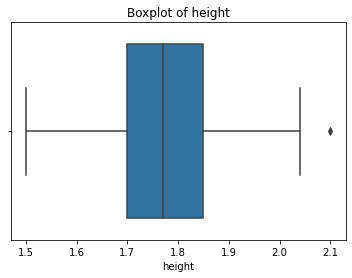

In [15]:
#Q1.3.1,2

sns.histplot(data=df, x="height").set(title='Histogram of height')
plt.show()
sns.boxplot(data=df, x="height").set(title='Boxplot of height')
plt.show()


#It seems to appear that the distribution of the data is symmetric, perhaps maybe even gaussian distribution around 1.75
#The boxplot indicates that there are a lot of outliers. This is reasonable since in some sports being very tall or short can be beneficial.

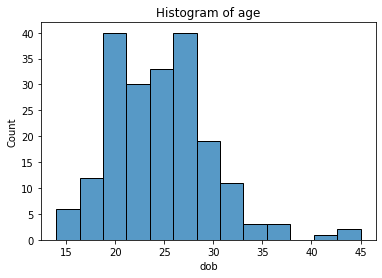

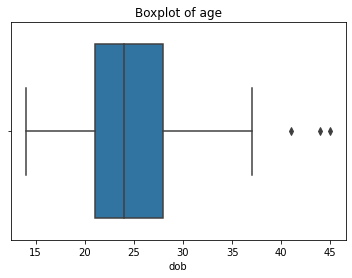

In [16]:
sns.histplot(data=df, x="dob").set(title='Histogram of age')
plt.show()
sns.boxplot(data=df, x="dob").set(title='Boxplot of age')
plt.show()

#It seems to appear that the distribution of the data is not symmetric, perhaps maybe even chi squared distribution. There's a long right tail.
#The boxplot indicates that there are a lot of outliers. This is surprising  since in most cases athletes tend to be young.

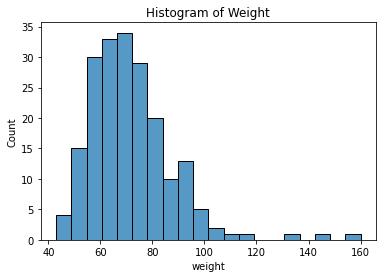

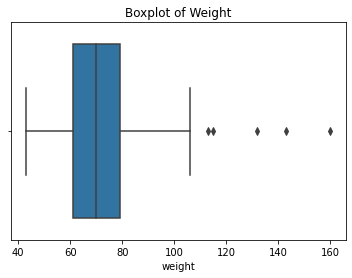

In [17]:
sns.histplot(data=df, x="weight").set(title='Histogram of Weight')
plt.show()
sns.boxplot(data=df, x="weight").set(title='Boxplot of Weight')
plt.show()


# The data appears to be distributed unsymmetricly, but not like any known distribution to us. There's a long right tail.
#The boxplot indicates that there are a lot of outliers. This is reasonable  since in some cases athletes tend to be very big or small, depending on the type of sport.

Q1.3.2:
There are no missing values since we removed them in order to visualize the data.


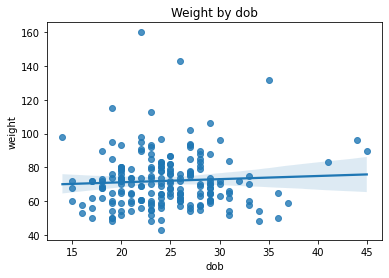

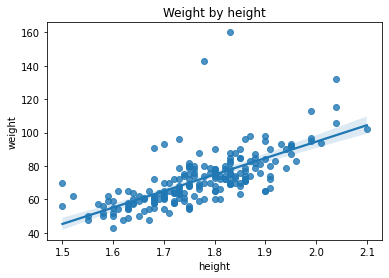

In [18]:
#Q1.3.3
for feature in ['dob', 'height']:
  sns.regplot(data=df, x= feature, y='weight').set_title(f"Weight by {feature}")
  plt.show()

#It seems that height is an excellent linear regressor for weight among athletes. it is save to assume that height has the most impact on weight among athletes in this study, since bones contributes greatly to body mass, and olympic athletes are extremely fit and in great shape.

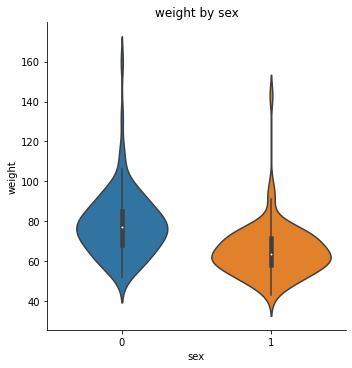

In [19]:
#Q1.3.4
sns.catplot(data=df, kind="violin", x="sex", y='weight')
plt.title('weight by sex')
plt.show()

#We can see here that the weight of men (label 0) varies much greatly than of the woman, and on a larger scope.This is significat since we can see that gender also affect drastically on weight.


In [20]:
!pip install scipy
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Q1.4

In [21]:
#Q1.4
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.stats import norm

y= df["Won_a_medal"].values
X=df

x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)
print("The model is:")
print("y = %5.10f + %5.10f*x1 + %5.10f*x2 + %5.10f*x3" % (b_vec[0][0],b_vec[1][0],
     b_vec[2][0],b_vec[3][0]))
print("Beta vector is:" ,b_vec )
print("Where: ")
for i,x in enumerate(['age','gender','height']):
  print(f"x{i+1} = {x}")

The model is:
y = -93.2853344409 + 0.2679994781*x1 + -3.9278130928*x2 + 90.6577199831*x3
Beta vector is: [[-93.28533444]
 [  0.26799948]
 [ -3.92781309]
 [ 90.65771998]]
Where: 
x1 = age
x2 = gender
x3 = height


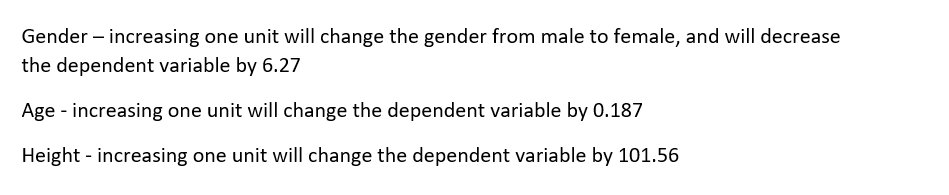

Q1.5

In [22]:
##ANOVA TABLE
import scipy.stats as stats
y_hat = np.matmul(x_matrix,b_vec)
ssr = np.sum((y_hat - np.mean(y_matrix))**2)
ssres = np.sum((y_matrix - y_hat)**2)
sst = ssr + ssres
reg_df = p-1
res_df = n-p
total_df =n-1
msr = ssr/reg_df
msres = ssres/res_df
mst = sst/total_df
f = msr/msres
p_val = 1-stats.f.cdf(f,reg_df, res_df)
sum_of_squares_list =[ssr,ssres,sst]
df_list = [reg_df,res_df,total_df]
ms_list = [msr,msres,mst]
F_values = [(f"F_statistic: {f}", f"p_value: {p_val}"),"",""]

print("ANOVA Table:")
df_new = pd.DataFrame({"Sum of Squares": sum_of_squares_list , "df": df_list, "MS": ms_list, "F":F_values})
df_new.index = ["Regression", "Residuales\Errors", "Total"]
pd.set_option('display.max_colwidth', None)
display(df_new)
R_squr = ssr/sst
Raaj= 1-(msres/mst)
print("R**2 is",R_squr)
print("Radj is ",Raaj)

ANOVA Table:


,Sum of Squares,df,MS,F
Regression,25239.853155,3,8413.284385,"(F_statistic: 62.88155217523443, p_value: 1.1102230246251565e-16)"
Residuales\Errors,26223.966845,196,133.795749,
Total,51463.820000,199,258.612161,


R**2 is 0.4904387811587795
Radj is  0.4826393747479444


Q1.6

In [23]:
# Q1.6 CI FOR BETA ESTIMATORS


x_df = df[['dob','sex','height']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix = x_df.to_numpy()
x_matrix = np.c_[np.ones(x_matrix.shape[0]), x_matrix]
n = x_matrix.shape[0]
p = x_matrix.shape[1]

b_vec = np.matmul(x_matrix.T,x_matrix)
b_vec = np.linalg.inv(b_vec)
b_vec = np.matmul(b_vec,x_matrix.T)
b_vec = np.matmul(b_vec,y_matrix)


C = np.linalg.inv(x_matrix.T@x_matrix)
e = y_matrix - np.dot(x_matrix, b_vec)
var_beta = 1/(n-p)*sum([x**2 for x in e])
full_athlete_df



full_x_df = full_athlete_df[['dob','sex','height']]
full_y_df = full_athlete_df[['weight']]
full_y_matrix = full_y_df.to_numpy()
full_x_matrix = full_x_df.to_numpy()
full_x_matrix = np.c_[np.ones(full_x_matrix.shape[0]), full_x_matrix]


full_b_vec = np.matmul(full_x_matrix.T,full_x_matrix)
full_b_vec = np.linalg.inv(full_b_vec)
full_b_vec = np.matmul(full_b_vec,full_x_matrix.T)
full_b_vec = np.matmul(full_b_vec,full_y_matrix)


z = norm.ppf(0.975) # normal statistic of  desired interval size
for i in range(len(b_vec)):
  an =  b_vec[i]-z*np.sqrt(var_beta)
  bn =  b_vec[i]+ z*np.sqrt(var_beta)
  print(f"95% Confidence Interval For beta_{i} estimator is: ({an},{bn}). \n\t\t\t\t\t\t\tis beta_{i} estimator for whole-dataset in CI? {an<=full_b_vec[i]<=bn}\n")


95% Confidence Interval For beta_0 estimator is: ([-115.9562599],[-70.61440899]). 
							is beta_0 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_1 estimator is: ([-22.40292598],[22.93892493]). 
							is beta_1 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_2 estimator is: ([-26.59873855],[18.74311236]). 
							is beta_2 estimator for whole-dataset in CI? [ True]

95% Confidence Interval For beta_3 estimator is: ([67.98679453],[113.32864544]). 
							is beta_3 estimator for whole-dataset in CI? [ True]



Q1.7

In [24]:
#Q1.7 WALD TEST:
y_hat = np.matmul(x_matrix,b_vec)
e = y_matrix - y_hat
ssq = np.sum(e**2)
var_noise = 1/(n-p)*ssq
x_inv = np.matmul(x_matrix.T,x_matrix)
x_inv = np.linalg.inv(x_inv)


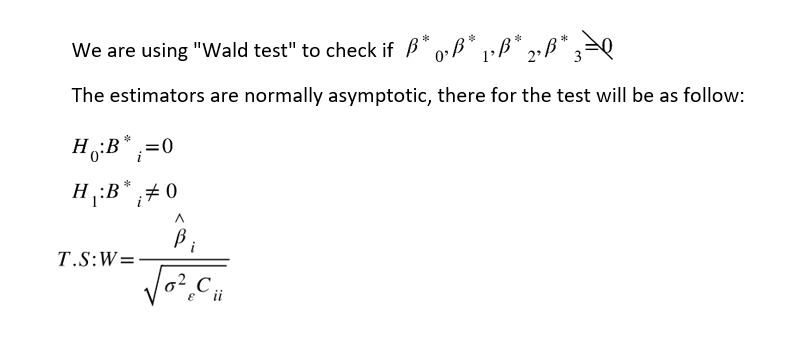

In [25]:
def wald_test(beta, i):
  y_hat = np.matmul(x_matrix,b_vec)
  e = y_matrix - y_hat
  ssq = np.sum(e**2)
  var_noise = 1/(n-p)*ssq
  x_inv = np.matmul(x_matrix.T,x_matrix)
  C = np.linalg.inv(x_inv)
  std_estimate = (var_noise*C[i][i])**(1/2) 
  Wald_statistic = beta/std_estimate
  p_value = 2*stats.norm.cdf(-abs(Wald_statistic))
  W_test_quantile = stats.norm.ppf(0.975)
  print("Wald test: ")
  print("Wald statistic: {}".format(Wald_statistic))
  print("P value: {}".format(p_value))
  print("W test quantile: {}".format(W_test_quantile))
  print("In Reject Region: {}".format(W_test_quantile < abs(Wald_statistic)))
  print()

In [26]:
beta_list= ['bias','age','gender','height']
for i,beta in enumerate(b_vec):
  print(f"beta {i}, coefficient of: {beta_list[i]} \n")
  wald_test(beta, i)

beta 0, coefficient of: bias 

Wald test: 
Wald statistic: [-5.94144756]
P value: [2.82516111e-09]
W test quantile: 1.959963984540054
In Reject Region: [ True]

beta 1, coefficient of: age 

Wald test: 
Wald statistic: [1.6643868]
P value: [0.09603516]
W test quantile: 1.959963984540054
In Reject Region: [False]

beta 2, coefficient of: gender 

Wald test: 
Wald statistic: [-2.11899317]
P value: [0.03409104]
W test quantile: 1.959963984540054
In Reject Region: [ True]

beta 3, coefficient of: height 

Wald test: 
Wald statistic: [10.96795017]
P value: [5.44937902e-28]
W test quantile: 1.959963984540054
In Reject Region: [ True]



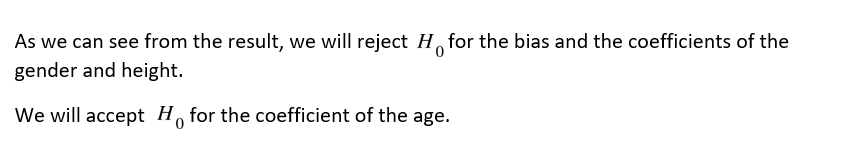

Q1.8

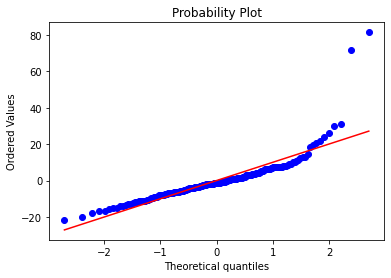

In [27]:
#Q1.8 check for residul distribution
import pylab
res = y_matrix - y_hat
res = res.T
res = res[0]
stats.probplot(res, dist="norm", plot=pylab)
pylab.show()


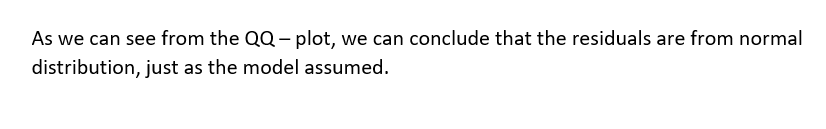

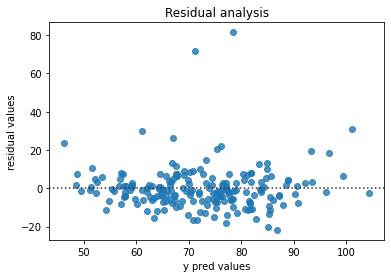

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.residplot(x=y_hat, y=res).set(xlabel = 'y pred values', ylabel ='residual values', title = "Residual analysis")
  
plt.show()

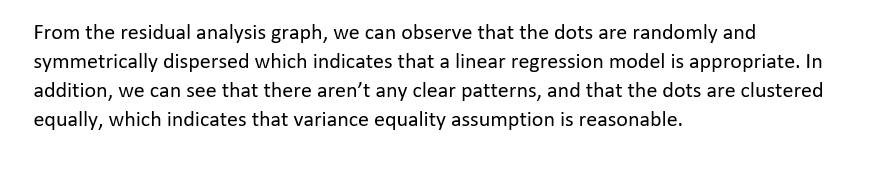

Q1.9

In [32]:
#Q1.9.1
athletes_df_1000

y1000 = athletes_df_1000['weight'].to_numpy()
x1000 =  athletes_df_1000[['dob','sex','height']].to_numpy()
x1000 = np.c_[np.ones(x1000.shape[0]), x1000]



y_hat1000 = np.matmul(x1000,full_b_vec)
y_hat1000= np.array([x[0] for x in y_hat1000])
# y_hat1000

In [33]:
#Q1.9.2, 3
res = y1000- y_hat1000
n=1000
z = norm.ppf(0.975) # normal statistic of  desired interval size
C = np.linalg.inv(x_matrix.T@x_matrix)
e = y_matrix - np.dot(x_matrix, full_b_vec)
counter=0
variance =  1/(n-p)*sum([x**2 for x in res])
# print(variance)
for y_hat,y,x in zip(y_hat1000,y1000,x1000):
  an= y-z*(variance*np.matmul(np.matmul(x,C),x.T)+variance)**0.5
  bn= y+z*(variance*np.matmul(np.matmul(x,C),x.T)+variance)**0.5

  if an<=y_hat and y_hat<=bn:
    counter+=1

#Q1.9.3

print(f"Proportion of times estimator appeared inside CI :{counter/10}% ")


Proportion of times estimator appeared inside CI :95.9% 


#We received a CI of 95.7% . Its is very close to our desired theoretical CI. The true meaning of a CI is that if we conduct this experiment an infinte amount of times, 95% of the time the estimator will be in our interval. Therfore, we can argue that we proved our CI to be true.

Q1.10

In [34]:
#Interaction model


y= df["Won_a_medal"].values
X_inter=df


X_inter['age_&_gender'] = X_inter['dob']*X_inter['sex']
X_inter['age_&_height'] = X_inter['dob']*X_inter['height']
X_inter['gender_&_heigh'] = X_inter['height']*X_inter['sex']

X_inter= X_inter.drop(['Won_a_medal', "sport", "country", 'population',	'gdp_per_capita'], axis=1)

x_df_inter = X_inter[['dob','sex','height','age_&_gender','age_&_height','gender_&_heigh']]
y_df = df[['weight']]
y_matrix = y_df.to_numpy()
x_matrix_inter = x_df_inter.to_numpy()
x_matrix_inter = np.c_[np.ones(x_matrix_inter.shape[0]), x_matrix_inter]
n = x_matrix_inter.shape[0]
p = x_matrix_inter.shape[1]

b_vec_in = np.matmul(x_matrix_inter.T,x_matrix_inter)
b_vec_in = np.linalg.inv(b_vec_in)
b_vec_in = np.matmul(b_vec_in,x_matrix_inter.T)
b_vec_in = np.matmul(b_vec_in,y_matrix)
print("The interactions model is:")
print("y = %5.10f + %5.10f*x1 + %5.10f*x2 + %5.10f*x3+%5.10f*x12 + %5.10f*x13 + %5.10f*x23" % (b_vec_in[0][0],b_vec_in[1][0],b_vec_in[2][0],b_vec_in[3][0],b_vec_in[4][0],b_vec_in[5][0],b_vec_in[6][0]))
print("Beta vector is:" ,b_vec_in )
print("Where: ")
for i,x in enumerate(['age','gender','height','age_&_gender','age_&_height','gender_&_heigh']):
  print(f"x{i+1} = {x}")


The interactions model is:
y = -72.6504452570 + -2.2314158817*x1 + 18.5326595784*x2 + 80.0736268030*x3+0.1820992567*x12 + 1.3386638975*x13 + -14.2192011745*x23
Beta vector is: [[-72.65044526]
 [ -2.23141588]
 [ 18.53265958]
 [ 80.0736268 ]
 [  0.18209926]
 [  1.3386639 ]
 [-14.21920117]]
Where: 
x1 = age
x2 = gender
x3 = height
x4 = age_&_gender
x5 = age_&_height
x6 = gender_&_heigh


In [35]:
n_int = x_matrix_inter.shape[0]
p_int = x_matrix_inter.shape[1]
y_hat_inter = np.matmul(x_matrix_inter,b_vec_in)
ssr_in = np.sum((y_hat_inter - np.mean(y_matrix))**2)
ssres_in = np.sum((y_matrix - y_hat_inter)**2)
sst_in = ssr_in + ssres_in
reg_df_in = p_int-1
res_df_in = n_int-p_int
total_df_inter =n_int-1
msr_inter = ssr_in/reg_df_in
msres_in = ssres_in/res_df_in
mst_in = sst_in/total_df_inter
Raaj_in= 1-(msres_in/mst_in)
var_estimate_in = 1/(n_int-p_int)*ssres_in
var_estimate = 1/(n-p)*ssres
mallow_value_in = ssres_in + 2*b_vec_in.shape[0]*var_estimate_in
mallow_value = ssres + 2*b_vec.shape[0]*var_estimate_in

compare_df = pd.DataFrame({
    "R_adjusted": [Raaj, Raaj_in],
    "mallow": [mallow_value, mallow_value_in]
})
compare_df.index = ["Original model","With interactions model"]
compare_df


,R_adjusted,mallow
Original model,0.482639,27101.587305
With interactions model,0.621458,22708.429398


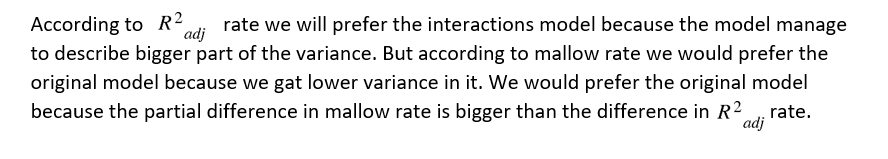

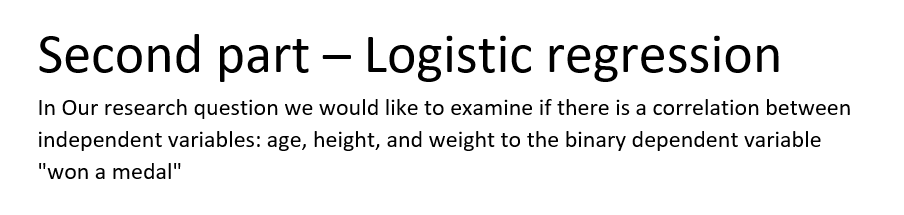

Q2.2

In [36]:
#Q2.2
full_athlete_df= full_athlete_df.dropna()
df=full_athlete_df.sample(n=200)
df

,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won_a_medal
1751,1,29.0,1.66,58.0,athletics,United States,3.214188e+08,56115.718426,0
2449,0,35.0,1.72,55.0,rowing,United Kingdom,6.513823e+07,43875.969614,1
787,1,23.0,1.65,60.0,rowing,Canada,3.585177e+07,43248.529909,1
512,1,42.0,1.71,73.0,handball,"Korea, South",5.061704e+07,27221.524051,0
3619,0,28.0,1.87,82.0,aquatics,Italy,6.080208e+07,29957.804315,0
...,...,...,...,...,...,...,...,...,...
3788,0,29.0,1.82,71.0,sailing,Sweden,9.798871e+06,50579.673649,0
5058,1,21.0,1.67,58.0,fencing,Brazil,2.078475e+08,8538.589975,0
7592,0,18.0,1.84,95.0,archery,China,1.371220e+09,8027.683810,0
3729,0,20.0,1.65,60.0,cycling,Italy,6.080208e+07,29957.804315,0


Q2.3

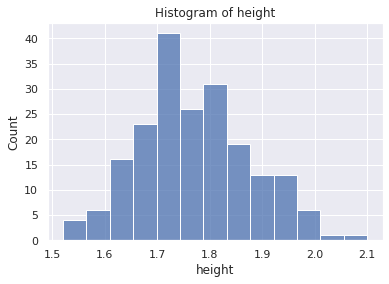

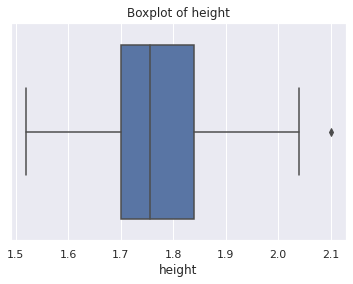

In [38]:
#Q2.3.1,2
sns.histplot(data=df, x="height").set(title='Histogram of height')
plt.show()
sns.boxplot(data=df, x="height").set(title='Boxplot of height')
plt.show()
print("There is no missing data since we removed null vaues for data visualization")

In [ ]:
sns.histplot(data=df, x="age").set(title='Histogram of age')
plt.show()
sns.boxplot(data=df, x="age").set(title='Boxplot of age')
plt.show()


In [ ]:
sns.histplot(data=df, x="weight").set(title='Histogram of Weight')
plt.show()
sns.boxplot(data=df, x="weight").set(title='Boxplot of Weight')
plt.show()


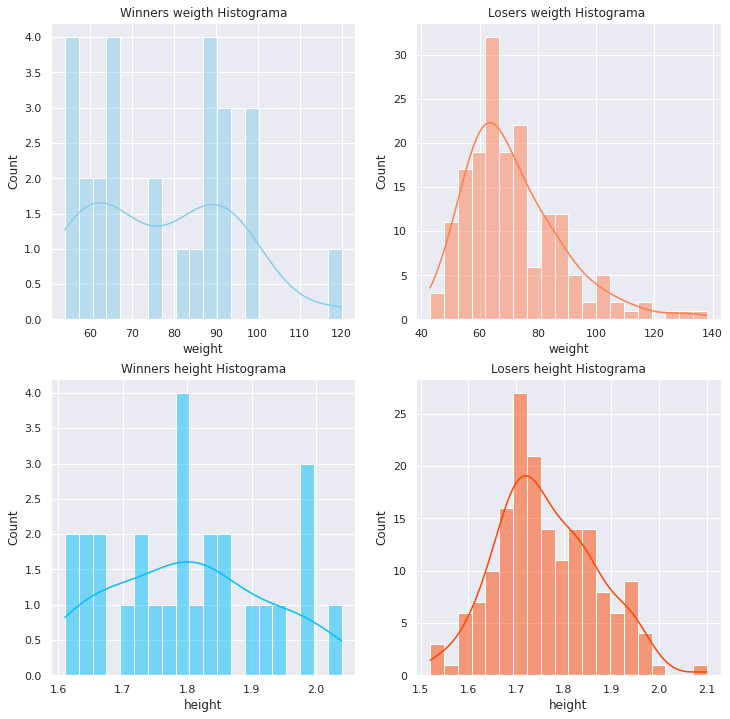

In [37]:
#Q2.3.3
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
df_won =df[(df.Won_a_medal>0)]
df_loss = df[(df.Won_a_medal==0)]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data=df_won['weight'], kde=True,bins = 20, color="skyblue", ax=axs[0, 0]).set(xlabel = 'weight' ,title = 'Winners weigth Histograma')
sns.histplot(data=df_loss['weight'], kde=True,bins = 20, color="coral", ax=axs[0, 1]).set(xlabel = 'weight' ,title = 'Losers weigth Histograma ')
sns.histplot(data=df_won['height'], kde=True, bins = 20,color="deepskyblue", ax=axs[1, 0]).set(xlabel = 'height' ,title = 'Winners height Histograma')
sns.histplot(data=df_loss['height'], kde=True, bins = 20,color="orangered", ax=axs[1, 1]).set(xlabel = 'height' ,title = 'Losers height Histograma')

plt.show()

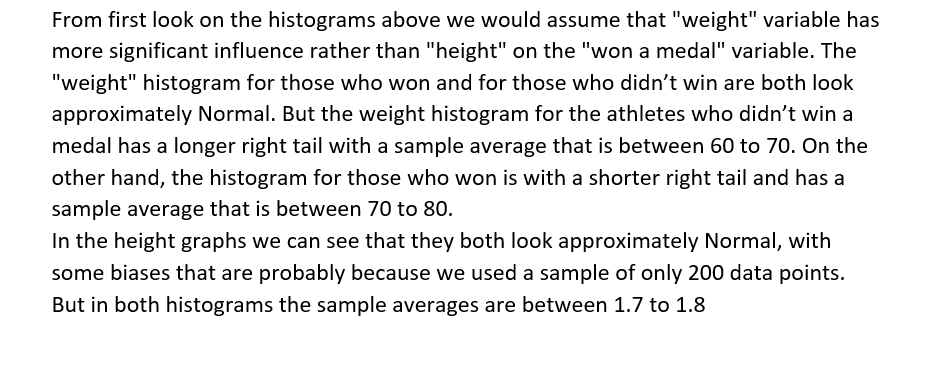

In [ ]:
#regular model
#Q2.6
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.stats import norm

y= df["Won_a_medal"].values
X=df

X= X.drop(['Won_a_medal', "dob", "sport", "country", 'population',	'gdp_per_capita'], axis=1)

X.insert(0, "x0", 1)
reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X, y)
beta = reg.coef_[0]
print("We have found that estimator for 200 data items b*  to the model is: ",beta)

In [ ]:
#Q2.6
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.stats import norm

y= df["Won_a_medal"].values
X=df
X['height_&_weight'] = X['height']*X['weight']
X['height_&_sex'] = X['height']*X['sex']
X['weight_&_sex'] = X['weight']*X['sex']

X= X.drop(['Won_a_medal', "dob", "sport", "country", 'population',	'gdp_per_capita'], axis=1)

X.insert(0, "x0", 1)
reg = LogisticRegression(penalty="none", fit_intercept=False).fit(X, y)
beta_interac = reg.coef_[0]
print("We have found that estimator for 200 data items b*  to interaction model is: ",beta_interac)

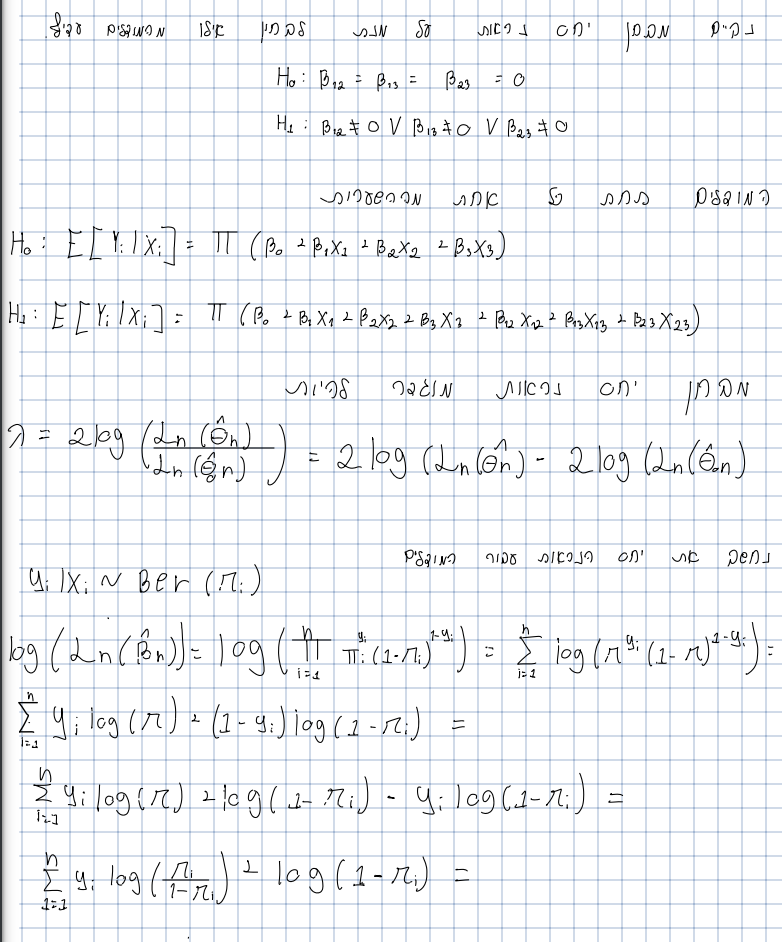

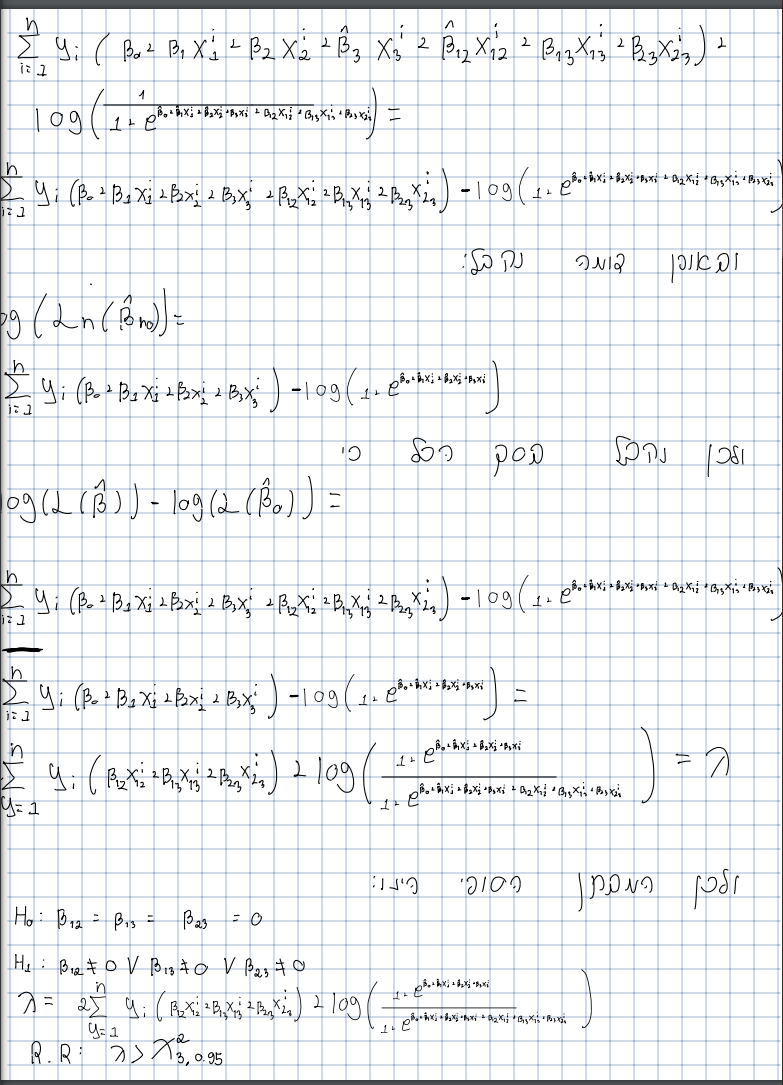

In [ ]:
#likeihood ratio test
#Q2.6
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
#first value
b12 = beta_interac[4]
b13 = beta_interac[5]
b23 = beta_interac[6]
b0_in = beta_interac[0]
b1_in = beta_interac[1]
b2_in= beta_interac[2]
b3_in = beta_interac[3]
x1 = X['height']
x2 = X['weight']
x3 = X['sex']
x12 = X['height_&_weight']*b12
x13 = X['height_&_sex']*b13
x23 = X['weight_&_sex']*b23
x_col = x12 + x13 +x23
y_col = df["Won_a_medal"] * x_col
#log value
b0 = beta[0]
b1 = beta [1]
b2= beta[2]
b3 = beta[3]
nominator = 1 + np.exp(b0 + b1*x1 + b2*x2 +b3*x3)
denominator = 1 + np.exp(b0_in + b1_in*x1 + b2_in*x2 + b3_in*x3 + x12+x13+x23)
log_val = np.log(nominator/denominator)
statistic = 2*sum(y_col + log_val)
quantile = stats.chi2.ppf(0.05,3)
print(f"Reject H0: {statistic > quantile}")


In [ ]:
#AIC RATIO
x1 = X['height'] *b1_in
x2 = X['weight']*b2_in
x3 = X['sex']*b3_in
x_col_inter = b0_in + x1+ x2+x3 + x12 + x13 +x23
log_val = np.log(denominator)
y_col_inter = df["Won_a_medal"] * x_col_inter
likelihood_inter = sum(y_col_inter - log_val)

x1 = X['height'] *b1
x2 = X['weight']*b2
x3 = X['sex']*b3
x_col_reg = b0 + x1+ x2+x3 + x12 + x13 +x23
log_val_reg = np.log(nominator)
y_col_reg = df["Won_a_medal"] * x_col_reg
likelihood_inter_reg = sum(y_col_reg - log_val_reg)

AIC_regular_model = likelihood_inter_reg - (beta.shape[0])
AIC_inter_model = likelihood_inter - (beta_interac.shape[0])

print(f"AIC of regular model: {AIC_regular_model}")
print(f"AIC of model with interactions: {AIC_inter_model}")

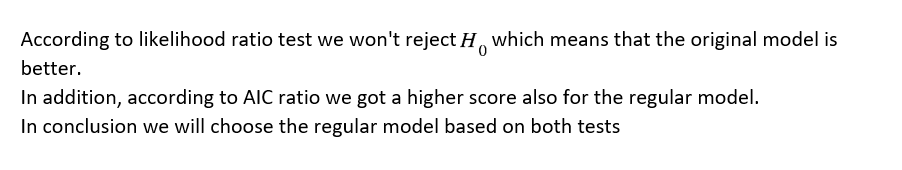